<a href="https://colab.research.google.com/github/stxfanix/ia/blob/main/acvtp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd


In [136]:
#pip install ydata-profiling
#from ydata_profiling import ProfileReport

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import warnings; warnings.simplefilter('ignore')
import statsmodels.tsa.stattools as stattools
import scipy.cluster.hierarchy as shc
from matplotlib import patches
from scipy.spatial import ConvexHull
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.stats import sem
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates

In [138]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("dataset.csv")


Saving dataset.csv to dataset (2).csv


In [139]:
#profile = ProfileReport(df, title="ACV")
#profile

In [140]:
df.shape

(43400, 12)

In [141]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [142]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


edad esta como flotante, los otros estan correctos, hay que ver lo de objetos

In [144]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


mínimo de edad no puede ser 0.8,
faltan datos de bmi


In [145]:
columna_edad=df['age']
print(columna_edad)

0         3.0
1        58.0
2         8.0
3        70.0
4        14.0
         ... 
43395    10.0
43396    56.0
43397    82.0
43398    40.0
43399    82.0
Name: age, Length: 43400, dtype: float64


hacemos foco en edad para entrar en detalle y analizar por que es flotante y el minimo tan bajo

In [146]:
#para encontrar los no enteros
no_enteros = df[df['age'] % 1 != 0]
print (no_enteros) #hay 1091 edades con coma de las 43400

          id  gender   age  hypertension  heart_disease ever_married  \
116     7559  Female  0.64             0              0           No   
129    22706  Female  0.88             0              0           No   
321    45238  Female  1.80             0              0           No   
323    61511  Female  0.32             0              0           No   
356    40639  Female  1.08             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43325  68126    Male  1.32             0              0           No   
43330  18634  Female  0.72             0              0           No   
43341  57592    Male  1.72             0              0           No   
43354  25158  Female  1.40             0              0           No   
43369  62703    Male  1.72             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi smoking_status  stroke  
116    children          Urban              83.82  24.

aca empieza el analisis para ver si se eliminan los numeros no enteros de las edades (#se eliminaron)

In [147]:
#posibles borrados
#comparar que no enteros coinciden con las filas esas que tengan nan
if 'bmi' in no_enteros.columns and 'smoking_status' in no_enteros.columns:
    res = no_enteros[
        no_enteros['bmi'].isna() & no_enteros['smoking_status'].isna()]
    print(res)

res.shape[0]

          id  gender   age  hypertension  heart_disease ever_married  \
1813   38920    Male  0.48             0              0           No   
3415   49553    Male  1.88             0              0           No   
3516   11658    Male  1.08             0              0           No   
3537   32514    Male  1.80             0              0           No   
4765   32147    Male  1.32             0              0           No   
6069   12075    Male  0.88             0              0           No   
6342   49373  Female  0.16             0              0           No   
6375    2518    Male  1.40             0              0           No   
6541   15831  Female  1.72             0              0           No   
7386    7232  Female  0.24             0              0           No   
7742    2069  Female  1.40             0              0           No   
7964   10776    Male  1.72             0              0           No   
8212   23027    Male  1.16             0              0         

39

comprobamos que no sean datos significativos en el analisis

In [148]:
#NO ENTEROS CON HIPERTENSION
if 'hypertension' in no_enteros.columns:
    res = no_enteros[no_enteros['hypertension'] == 1]
    print(res)
    print("no enteros con hipertension:",res.shape[0])
    #no es necesario correr este (lo puse de nuevo porque se habia borrado)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
no enteros con hipertension: 0


In [149]:
#NO ENTEROS CON UN ATAQUE CARDIACO
if 'heart_disease' in no_enteros.columns:
    res = no_enteros[no_enteros['heart_disease'] == 1]
    print(res)
    print("no enteros que tuvieron un infarto: ",res.shape[0])
       #no es necesario correr este (lo puse de nuevo porque se habia borrado)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
no enteros que tuvieron un infarto:  0


In [150]:
#NIVEL DE GLUCOSA MAYOR A 180 EN LAS EDADES NO ENTERAS
if 'avg_glucose_level' in no_enteros.columns:

    res = no_enteros[no_enteros['avg_glucose_level'] > 180] #Condicion
    print(res)
    print("no enteros de avg_glucose_level superiores a 180: ",res.shape[0])
       #no es necesario correr este (lo puse de nuevo porque se habia borrado)


          id  gender   age  hypertension  heart_disease ever_married  \
14150  44829  Female  0.64             0              0           No   
16244  42756    Male  0.88             0              0           No   
21114  49097    Male  1.24             0              0           No   
23324  72131    Male  0.80             0              0           No   
27265  72121    Male  0.72             0              0           No   
37419  42276  Female  1.56             0              0           No   
41351  46347    Male  0.40             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi smoking_status  stroke  
14150  children          Urban             198.74  16.3            NaN       0  
16244  children          Urban             208.25  21.8            NaN       0  
21114  children          Urban             181.81  22.9            NaN       0  
23324  children          Urban             205.63  21.7            NaN       0  
27265  children   

In [151]:
glucosaaltadenoenteros=no_enteros[no_enteros['avg_glucose_level'] <70].shape[0]
glucosaaltadenoenteros
othereliminados=no_enteros[no_enteros['gender']=="other"]
othereliminados

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [152]:
#NIVEL DE GLUCOSA MENOR A 70
if 'avg_glucose_level' in no_enteros.columns:
    res = no_enteros[no_enteros['avg_glucose_level'] < 70] #condicion
    print(res)
    print("no enteros de avg_glucose_level inferiores a 70: ", res.shape[0])
     #no es necesario correr este (lo puse de nuevo porque se habia borrado)

          id  gender   age  hypertension  heart_disease ever_married  \
321    45238  Female  1.80             0              0           No   
356    40639  Female  1.08             0              0           No   
514    49529  Female  1.16             0              0           No   
861    66772  Female  0.32             0              0           No   
869    57854    Male  1.64             0              0           No   
...      ...     ...   ...           ...            ...          ...   
42615  45571  Female  1.64             0              0           No   
42790  43586    Male  1.08             0              0           No   
43093  69901  Female  1.72             0              0           No   
43158  67572    Male  1.88             0              0           No   
43269  52551  Female  1.64             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi smoking_status  stroke  
321    children          Urban              58.26  16.

In [153]:
#HAY QUE CORRERLO
#eliminacion de filas de todos los numeros no enteros (1091)
indices_a_eliminar = df[df['age'] % 1 != 0].index
df = df.drop(indices_a_eliminar)
df.shape


(42309, 12)

In [154]:
#HAY QUE CORRERLO
#ponemos en el mismo formato todas las columnas
df.rename(columns={'Residence_type': 'residence_type'}, inplace=True)

print(df)

          id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  

In [155]:
df["age"]

,age
0,3.0
1,58.0
2,8.0
3,70.0
4,14.0
...,...
43395,10.0
43396,56.0
43397,82.0
43398,40.0


In [156]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,42309.000000,42309.000000,42309.000000,42309.000000,42309.000000,40886.000000,42309.000000
mean,36316.482025,43.279350,0.095984,0.048737,104.789186,28.878604,0.018483
std,21075.359748,21.803304,0.294573,0.215320,43.448966,7.664070,0.134692
min,1.000000,1.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18013.000000,26.000000,0.000000,0.000000,77.570000,23.600000,0.000000
50%,36320.000000,45.000000,0.000000,0.000000,91.650000,28.000000,0.000000
75%,54526.000000,60.000000,0.000000,0.000000,112.260000,33.000000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


analizamos que no modifique mucho y verificamos que el minimo de edad sea 1.

TRANSFORMACIÓN, NORMALIZACIÓN Y ELIMINACION

In [157]:
df.drop('id', axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [158]:
df.duplicated().sum() #comprobamos que no haya duplicados

0

In [159]:
nulogenero_df=df[df["gender"].isna( )] #comprobamos que la variable género no tenga nan.
nulogenero_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [160]:
nuloedad_df=df[df["age"].isna( )]
nuloedad_df #comprobamos que la columna edad no tenga NaN.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [161]:
nulohipertension_df=df[df["hypertension"].isna( )]
nulohipertension_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [162]:
nulocardiopatia_df=df[df["heart_disease"].isna( )]
nulocardiopatia_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [163]:
nulocasado_df=df[df["ever_married"].isna( )]
nulocasado_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [164]:
nulotipotrabajo_df=df[df["work_type"].isna( )]
nulotipotrabajo_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [165]:
nuloresidencia_df=df[df["residence_type"].isna( )]
nuloresidencia_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [166]:
nuloglucosa_df=df[df["avg_glucose_level"].isna( )]
nuloglucosa_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [167]:
nulobmi_df=df[df["bmi"].isna( )] #hay 1423 faltantes
nulobmi_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
95,31091,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
113,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
186,11999,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,NaN,smokes,0
231,22470,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43317,2558,Female,62.0,0,1,Yes,Govt_job,Urban,72.29,NaN,never smoked,0
43339,10463,Female,76.0,0,0,No,Private,Rural,100.55,NaN,never smoked,1
43351,7580,Female,58.0,1,0,Yes,Private,Urban,99.29,NaN,NaN,0
43371,18119,Female,78.0,0,0,Yes,Private,Urban,182.45,NaN,formerly smoked,0


In [168]:
nulofumador_df=df[df["smoking_status"].isna( )]
nulofumador_df#hay 12201 datos faltantes en la columna estado de fumar

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [169]:
nuloACV_df=df[df["stroke"].isna( )]
nuloACV_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


ESTANDARIZACION DE LOS DATOS:

In [170]:
#correrlo si o si
df['age'] = df['age'].astype(int) #ya son todos enteros

In [171]:
df.describe() #verificamos

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,42309.000000,42309.000000,42309.000000,42309.000000,42309.000000,40886.000000,42309.000000
mean,36316.482025,43.279350,0.095984,0.048737,104.789186,28.878604,0.018483
std,21075.359748,21.803304,0.294573,0.215320,43.448966,7.664070,0.134692
min,1.000000,1.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18013.000000,26.000000,0.000000,0.000000,77.570000,23.600000,0.000000
50%,36320.000000,45.000000,0.000000,0.000000,91.650000,28.000000,0.000000
75%,54526.000000,60.000000,0.000000,0.000000,112.260000,33.000000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [172]:
#COMPROBACION DE QUE LAS EDADES SEAN VALIDAS
edades_menores= df[df['age'] < 0]
edades_mayores = df[df['age'] > 100]

print("menores a 0:")
print(edades_menores)

print("mayores a 100:")
print(edades_mayores)

invalidas_menores = (df['age'] < 0).sum()

invalidas_mayores= (df['age'] > 100).sum()

print(" menores a 0:", invalidas_menores)
print("mayores a 100:", invalidas_mayores)


#TODO EN ORDEN

menores a 0:
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
mayores a 100:
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
 menores a 0: 0
mayores a 100: 0


In [173]:
residencia=df['residence_type'].value_counts()
print (residencia)

residence_type
Urban    21191
Rural    21118
Name: count, dtype: int64


In [174]:
infantes= df[df['age']<6]
print ("infantes:" ,infantes)

niños=df[(df['age']>6)& (df['age'] <12)]
print ("niños: ",niños)

adolescentes= df[(df['age']>12)& (df['age'] <24)]
print("adolescentes: ",adolescentes)

adultos=df[(df['age']>24)& (df['age'] <50)]
print ("adultos: ",adultos)

adultos_mayores= df[df['age']>50]
print("adultos mayores: ",adultos_mayores)


infantes:           id  gender  age  hypertension  heart_disease ever_married work_type  \
0      30669    Male    3             0              0           No  children   
33     33759  Female    3             0              0           No  children   
42     11014    Male    4             0              0           No  children   
122     8171  Female    4             0              0           No  children   
133    31741    Male    4             0              0           No  children   
...      ...     ...  ...           ...            ...          ...       ...   
43229  54050  Female    4             0              0           No  children   
43271  18655  Female    5             0              0           No  children   
43282   7961    Male    3             0              0           No  children   
43352  25684    Male    2             0              0           No  children   
43376  65913  Female    3             0              0           No  children   

      residence_t

In [175]:
generos=df['gender'].value_counts()
print (generos)
#los valores estan bien

gender
Female    25129
Male      17169
Other        11
Name: count, dtype: int64


son 11 valores que capaz podemos omitir para simplificar los grafico

In [176]:
otro_genero=df[df['gender']=="Other"]
print(otro_genero)
otro_genero.shape

          id gender  age  hypertension  heart_disease ever_married work_type  \
2914   56156  Other   26             0              0           No   Private   
10768  26188  Other   46             0              0           No   Private   
15620  52984  Other   27             0              0           No   Private   
15838  24893  Other   53             0              0          Yes   Private   
19748  13471  Other   39             0              0          Yes  Govt_job   
21041  31015  Other   19             0              0           No   Private   
21192  27043  Other   49             0              0          Yes   Private   
24252  51111  Other   51             0              0          Yes   Private   
26199  42452  Other   10             0              0           No  children   
26831  49812  Other   53             0              0          Yes  Govt_job   
40768  14986  Other   11             0              0           No  children   

      residence_type  avg_glucose_level

(11, 12)

In [177]:
hypertension_count = otro_genero['hypertension'].sum()
heart_disease_count = otro_genero['heart_disease'].sum()
stroke_count = otro_genero['stroke'].sum()

print("hipertension:",hypertension_count)
print("desorden cardiaco", heart_disease_count)
print("acv:", stroke_count)

hipertension: 0
desorden cardiaco 0
acv: 0


In [178]:
trabajos=df['work_type'].value_counts()
print(trabajos) #hay que reemplazar children por Children para que sea del mismo modo todos

work_type
Private          24834
Self-employed     6793
Govt_job          5440
children          5065
Never_worked       177
Name: count, dtype: int64


In [179]:
#EJECUTAR
#cambio de tipo de trabajos
df['work_type'] = df['work_type'].replace('children', 'Children')  #se reemplaza children por Children para que sea del mismo modo todos
#comprobacion
trabajos=df['work_type'].value_counts()
print(trabajos)

work_type
Private          24834
Self-employed     6793
Govt_job          5440
Children          5065
Never_worked       177
Name: count, dtype: int64


revisar si se cambia o no el tipo

In [180]:
fumador=df['smoking_status'].value_counts()
print (fumador)#se va a pasar a mayusculas igual que el resto de categorias

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64


In [181]:
#ejecutar
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 'Never smoked',
    'formerly smoked': 'Formerly smoked',
    'smokes': 'Smokes'
})
#comprobamos
fumador=df['smoking_status'].value_counts()
print (fumador)


smoking_status
Never smoked       16053
Formerly smoked     7493
Smokes              6562
Name: count, dtype: int64


ANALISIS PARA VER QUE HACEMOS CON LOS DATOS FALTANTES DE BMI Y SMOKING

In [182]:
promediobmi=df["bmi"].mean()
promediobmi #promedio del bmi es 28,9
nonulobmi_df=df[df["bmi"].notna( )]
promediobmi


28.878603923103267

comenzamos a observar que el promedio de bmi indica sobrepeso.

In [183]:
infantes.shape[0] #hay 1804 infantes
niños.shape[0] #hay 1787 ninos
adolescentes.shape[0] #hay 5223 adolescentes
adultos.shape[0] #hay 14449 adultos
adultos_mayores.shape[0] #hay 17202
#hay 31.651 mayores y 8814 menores.


17202

el promedio es acorde ya de por si porque el 75% de los datos son de adultos/personas mayores.

In [184]:
nulobmi_df#eran 1423 nulos
bmiporglucosaalto=nulobmi_df[nulobmi_df["avg_glucose_level"]>110]
bmiporglucosaalto #la mitad de los datos faltantes de bmi son de personas con el nivel de glucosa alto
bmiyedad_df=nulobmi_df[["bmi","age"]]
bmiporedadalto_df=bmiyedad_df[bmiyedad_df["age"]>40]
bmiporedadalto_df  #2/3 de los datos faltantes de bmi son de personas con edad alta
bmiporacv_df=nulobmi_df[nulobmi_df["stroke"]==0]
bmiporacv_df #casi todos los datos faltantes de bmi son de personas que no tienen ACV.
bmiporgenero_df=nulobmi_df[nulobmi_df["gender"]=="Male"]
bmiporgenero_df#se reparte mitad y mitad
bmiporedadalto_df
bmiyfumar=nulobmi_df[nulobmi_df["avg_glucose_level"]=="never smoked"]
bmiyfumar #todos los datos faltantes de bmi son de personas que no fuman
bmiyhipertension=nulobmi_df[nulobmi_df["hypertension"]==0]
bmiyhipertension #2/3 de todos los datos faltantes de bmi son de los que no tienen hipertension.
bmiycardiopatia=nulobmi_df[nulobmi_df["heart_disease"]==0]
ohter=nulobmi_df[nulobmi_df["gender"]=="Other"]
ohter

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
10768,26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0
15620,52984,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smokes,0
15838,24893,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,NaN,0
26831,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0


In [185]:

glucosa_alta = 110
bminulo_glucosa_alta = df[(df['bmi'].isna()) & (df['avg_glucose_level'] > glucosa_alta)]

bminulo_glucosa_alta_filtrado = bminulo_glucosa_alta[(bminulo_glucosa_alta['age'] >= 25) & (bminulo_glucosa_alta['age'] <= 70)]

edad_min = bminulo_glucosa_alta_filtrado['age'].min()
edad_max = bminulo_glucosa_alta_filtrado['age'].max()

edad_mediana = bminulo_glucosa_alta_filtrado['age'].median()

print("El rango de edad para los bminulos con glucosa alta es: ", edad_min, "a", edad_max)
print("La mediana de edad para los bminulos con glucosa alta es: ",edad_mediana)


El rango de edad para los bminulos con glucosa alta es:  25 a 70
La mediana de edad para los bminulos con glucosa alta es:  57.0


analisis para confirmar que la glucosa es alta

<Axes: >

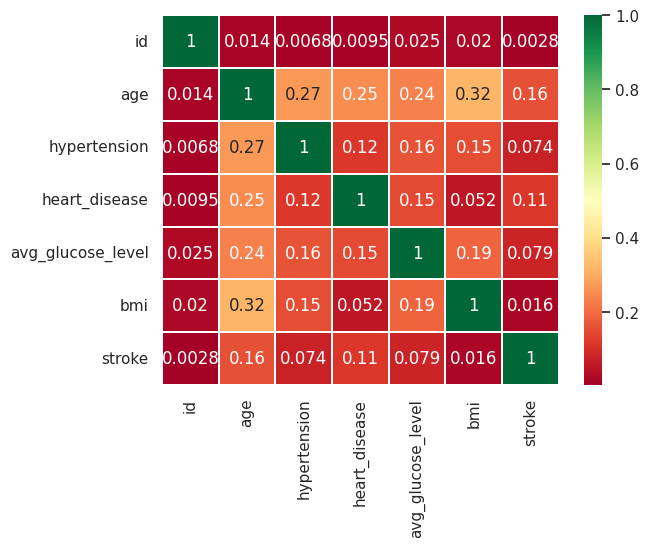

In [186]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
#ejecutarlo de nuevo porque lo hice cuando ya borramos bmi

El grafico nos muestra que no hay una relación significariva entre las variables por lo que vamos a proceder a eliminar los datos NaN del bmi.

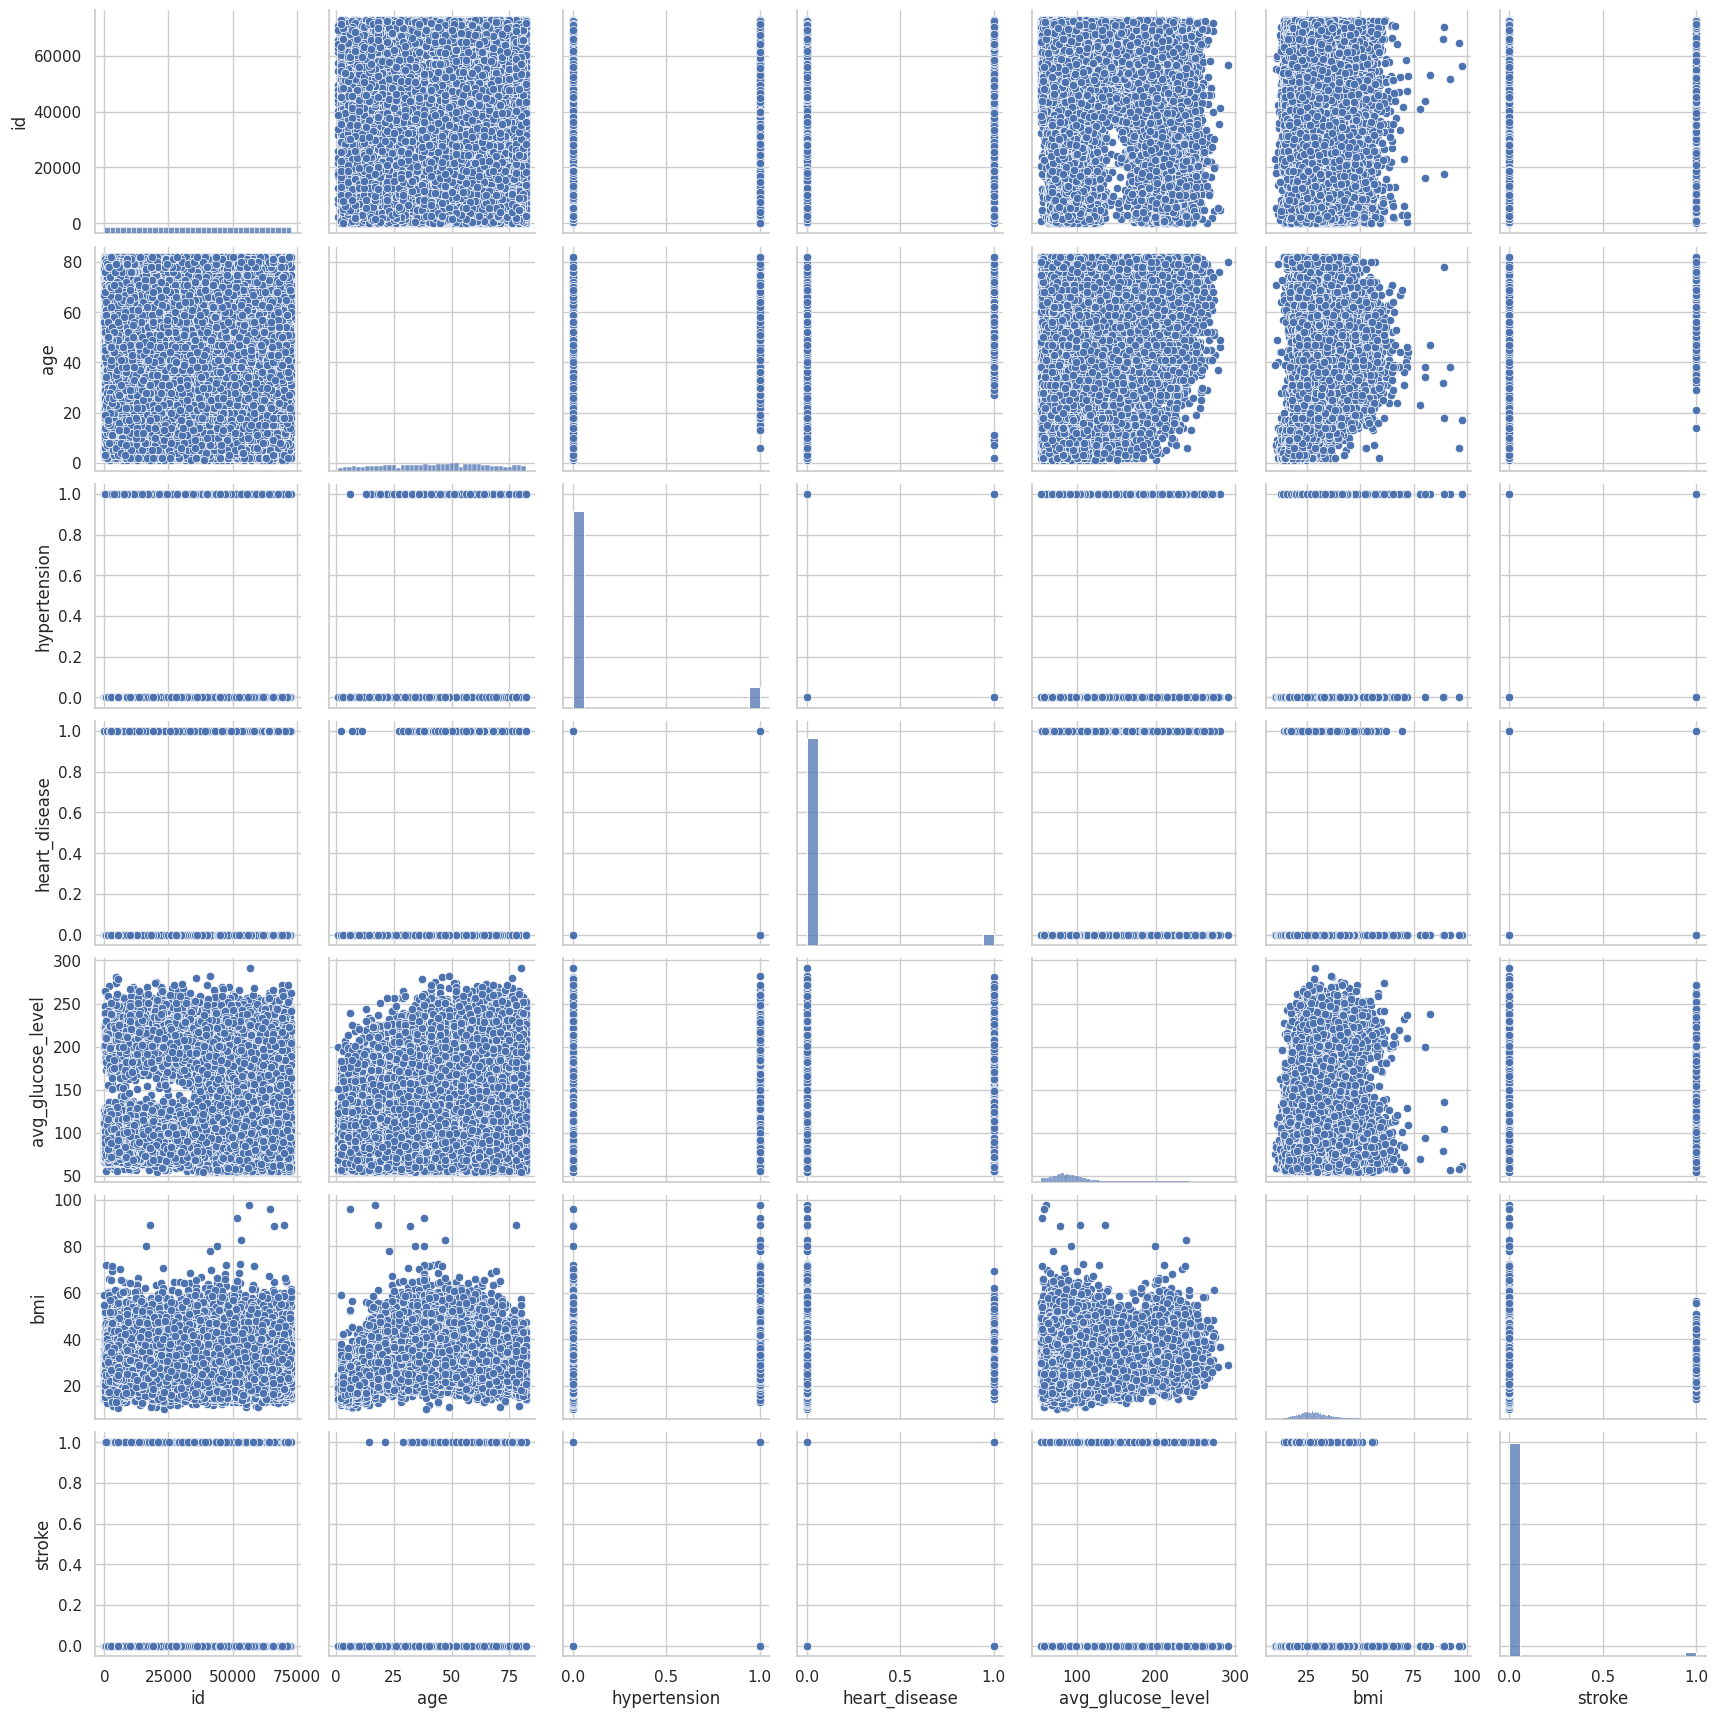

In [187]:
sns.pairplot(df)
#ejecutarlo de nuevo porque lo hice cuando ya borramos bmi

grafico de dispersion para seguir viendo las relaciones como la de bmi y stroke antes de eliminar, comprobamos que no hay.

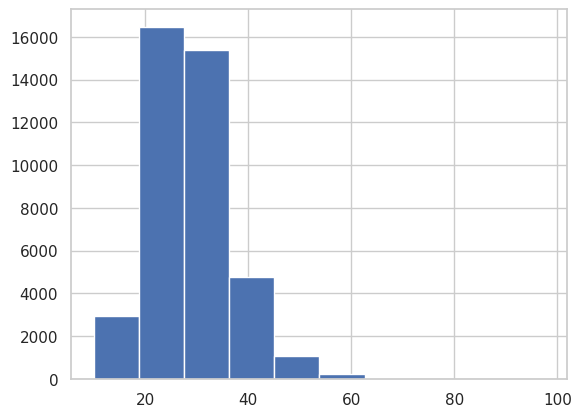

In [188]:
plt.hist(df["bmi"])
plt.show()

vemos la distribucion de los datos antes de borrarlos

In [196]:
valoresnonulos=df[df["bmi"].notna( )] #vemos los bmi que no son nulos
cantidaddepersonasconacv=df[df["stroke"]==1] #hay 782 personas con acv
valoresnonulosconacv=valoresnonulos[valoresnonulos["stroke"]==1] #hay 643 personas con acv con bmi registrado, es un 83%
valoresnonulosconacv
indicesaeliminar=df[df['bmi'].isna()].index
indicesaeliminar #comprobamos que vamos a eliminar los correctos
df = df.drop(indicesaeliminar)#borramos
df.shape#comprobamos que se hayan borrado

(40886, 12)

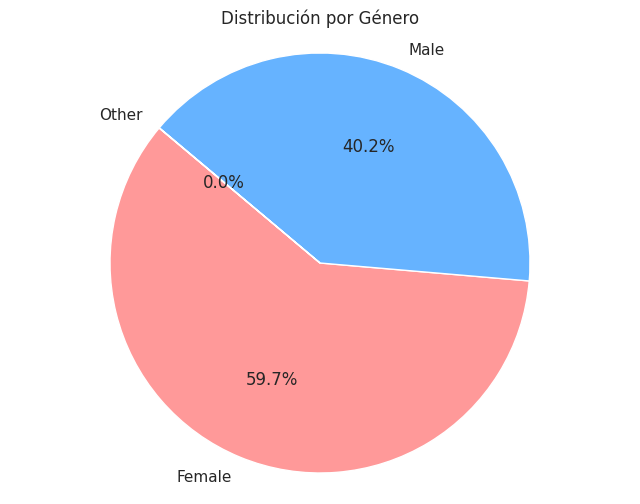

In [199]:
#como entre los bmi habia algunos del genero other, revisamos como queda eso que de por si era minoria
cant_gen = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cant_gen, labels=cant_gen.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribución por Género')
plt.axis('equal')  # eso de equal parece que hace que los graficos sean redondos
plt.show()

In [198]:
cant=df['gender'].value_counts() #hay 7 other, por lo que es en vano tenerlo
print (cant)

gender
Female    24429
Male      16450
Other         7
Name: count, dtype: int64


In [ ]:
#borramos los other que quedan
indices_other = df[df['gender'] == 'Other'].index
eliminar_other = df.drop(indices_other)
print (eliminar_other)

<Axes: >

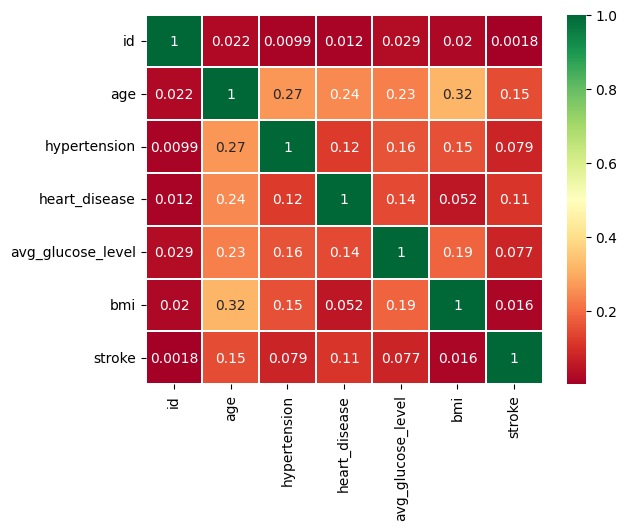

In [56]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

comprobamos que las relaciones no fueron modificadas.

> Agregar bloque entrecomillado



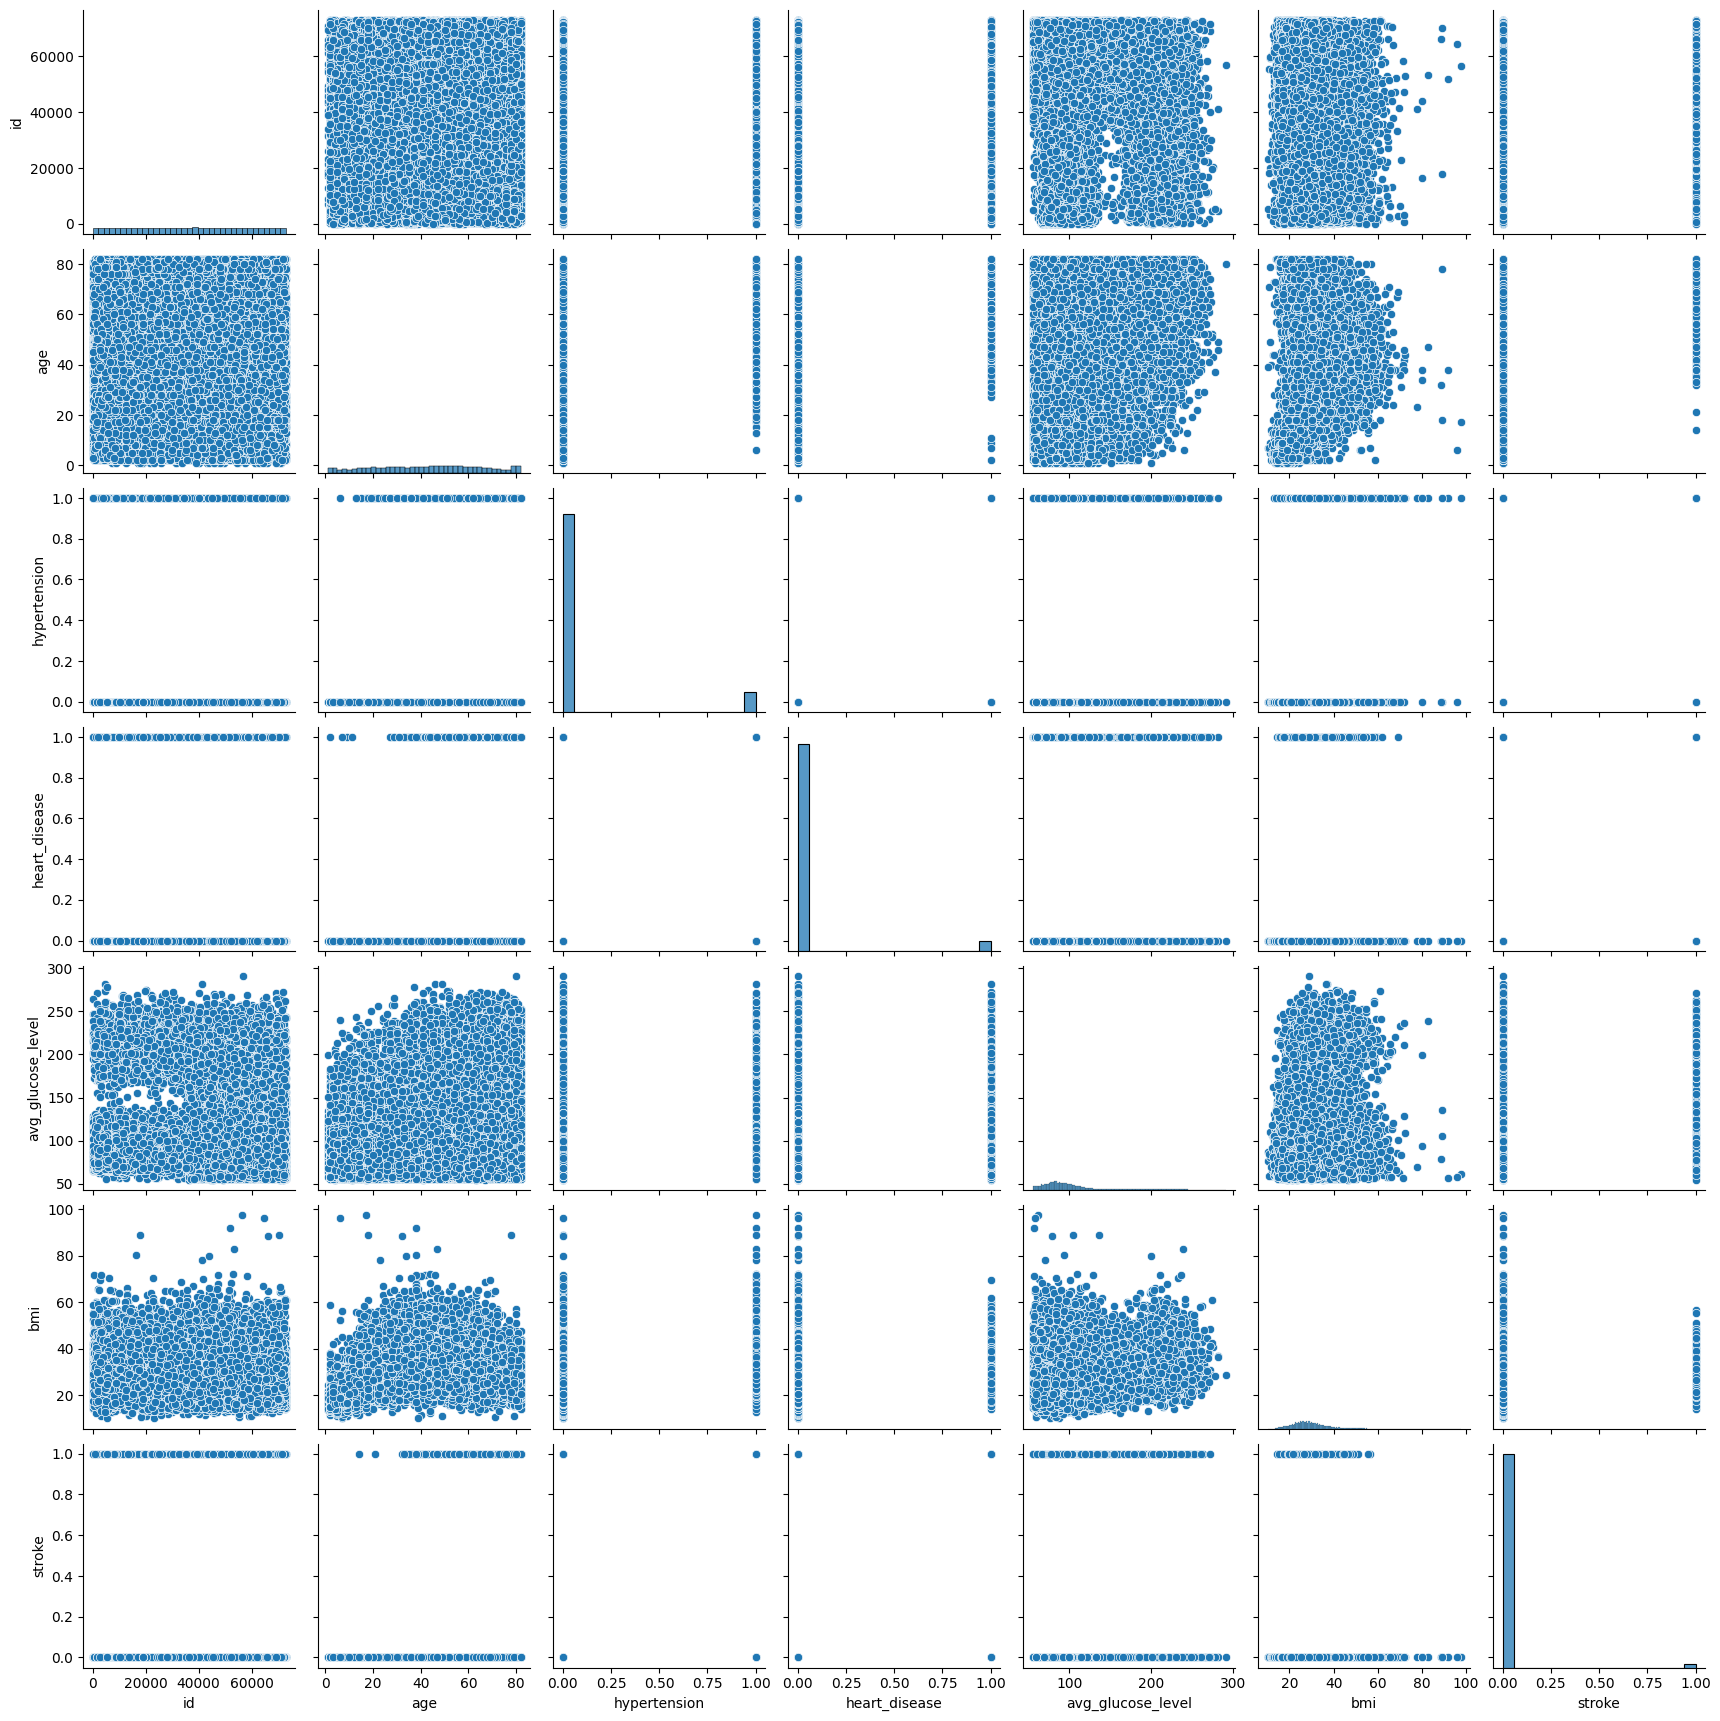

In [57]:
sns.pairplot(df)

comprobamos que no hayan cambiado muchos las relaciones

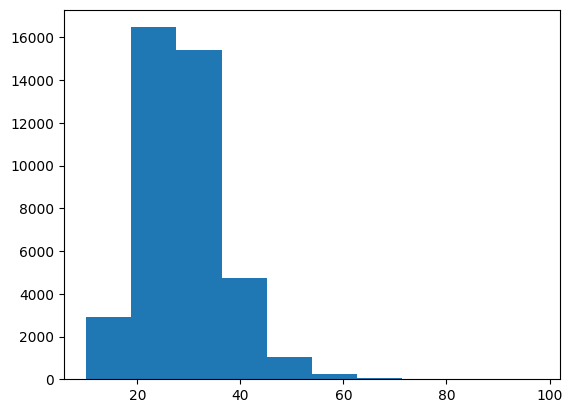

In [58]:
plt.hist(df["bmi"])
plt.show()

comprobamos que la eliminación no provocó sesgo

In [59]:
fumadornonulo=df[df["smoking_status"].notna()]
nuncafumaron=fumadornonulo[fumadornonulo['smoking_status']=='Never smoked'] #la mayoria no fuma
fumadornonulo

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,Never smoked,0
3,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,Formerly smoked,0
6,52800,Female,52,0,0,Yes,Private,Urban,77.59,17.7,Formerly smoked,0
7,41413,Female,75,0,1,Yes,Self-employed,Rural,243.53,27.0,Never smoked,0
8,15266,Female,32,0,0,Yes,Private,Rural,77.67,32.3,Smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10,0,0,No,Children,Urban,58.64,20.4,Never smoked,0
43396,5450,Female,56,0,0,Yes,Govt_job,Urban,213.61,55.4,Formerly smoked,0
43397,28375,Female,82,1,0,Yes,Private,Urban,91.94,28.9,Formerly smoked,0
43398,27973,Male,40,0,0,Yes,Private,Urban,99.16,33.2,Never smoked,0


In [60]:
otherahora=df[df["gender"]=="Other"]
otherahora

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,56156,Other,26,0,0,No,Private,Rural,143.33,22.4,Formerly smoked,0
19748,13471,Other,39,0,0,Yes,Govt_job,Urban,95.59,32.0,Formerly smoked,0
21041,31015,Other,19,0,0,No,Private,Rural,75.76,32.2,Formerly smoked,0
21192,27043,Other,49,0,0,Yes,Private,Urban,94.88,37.2,Never smoked,0
24252,51111,Other,51,0,0,Yes,Private,Rural,91.75,32.2,Formerly smoked,0
26199,42452,Other,10,0,0,No,Children,Rural,72.05,21.2,Formerly smoked,0
40768,14986,Other,11,0,0,No,Children,Urban,101.30,18.1,Formerly smoked,0


In [61]:
df["smoking_status"].value_counts()

,count
smoking_status,
Never smoked,15747
Formerly smoked,7099
Smokes,6226


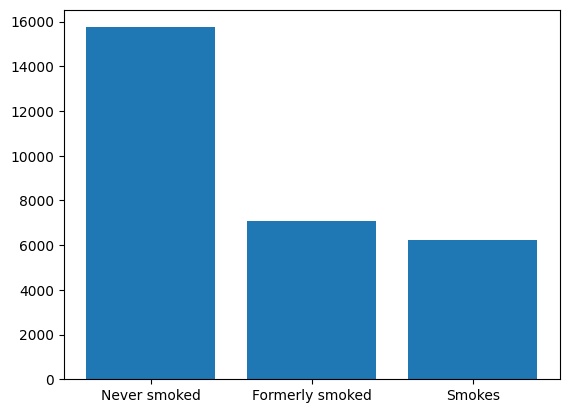

In [62]:
valores=df["smoking_status"].value_counts().values
nombres=df["smoking_status"].value_counts().index
plt.bar(nombres,valores)
plt.show()
#ejecutarlo de nuevo porque lo toque sin querer dsp de cambiar

In [63]:
fumadornulo=df[df["smoking_status"].isna()]
fumadornulo #11814 son ahora que borramos datos
fumarporglucosaalto=fumadornulo[fumadornulo["avg_glucose_level"]>110]
fumarporglucosaalto #la mayoria de los datos faltantes de estado de fumar son de personas con el nivel de glucosa normal.
fumaryedad=fumadornulo[["smoking_status","age"]]
fumarmenores_df=fumaryedad[fumaryedad["age"]<24]
fumarmenores_df  #la mitad de los datos faltantes de fumar son de menores.
fumaryacv_df=fumadornulo[fumadornulo["stroke"]==0]
fumaryacv_df #el 99% datos faltantes de fumar son de personas que no tienen ACV.
fumarporgenero_df=fumadornulo[fumadornulo["gender"]=="Male"]
fumarporgenero_df#se reparte mas o menos mitad y mitad, hay mas mujeres.
fumaryhipertension=fumadornulo[fumadornulo["hypertension"]==0]
fumaryhipertension #casi todos de los datos faltantes de smoking son de los que no tienen hipertension.
fumaryheart=fumadornulo[fumadornulo["heart_disease"]==0] #casi todos de los datos faltantes de smoking son de los que no tienen cardiopatia.
fumaryheart
fumaryresidencia=fumadornulo[fumadornulo["residence_type"]=="Rural"]
fumaryresidencia #hay mitad y mitad en cuanto a tipos de residencias
fumarycasado=fumadornulo[fumadornulo["ever_married"]=="Yes"]
fumarycasado #se reparte mitad y mitad


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
5,32257,Female,47,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
20,29217,Female,65,1,0,Yes,Private,Rural,75.70,41.8,NaN,0
30,67210,Male,27,0,0,Yes,Self-employed,Urban,82.90,25.0,NaN,0
31,29908,Female,47,0,0,Yes,Private,Urban,103.26,25.4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43367,45683,Male,62,0,1,Yes,Govt_job,Urban,71.90,26.9,NaN,0
43368,50503,Female,34,0,0,Yes,Private,Urban,85.86,40.1,NaN,0
43372,45066,Male,36,1,0,Yes,Private,Urban,149.22,33.4,NaN,0
43379,13530,Male,47,0,1,Yes,Govt_job,Urban,89.25,29.0,NaN,0


([<matplotlib.axis.YTick at 0x7dd901d091b0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

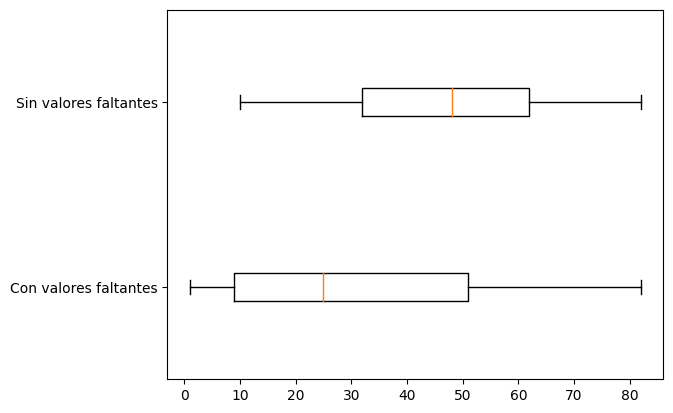

In [64]:
BM_MV=df.smoking_status.isna() #devuelve false si los valores no son nulos y true si son nulos
MV_labels=["Con valores faltantes","Sin valores faltantes"] #lista con los titulos del grafico
box_sr=pd.Series(" ",index=BM_MV.unique()) #lista de valores unicos de bm
for poss in BM_MV.unique(): #itera sobre lo valores unicos de BM_MV
  BM = BM_MV == poss  #crea serie booleana donde si  poss es true cada valor va a ser true si el valor en BM_MV es True
  box_sr[poss]=df[BM].age #se actualiza box_sr donde si poss es true entonces box_sr en la posicion true contendra las temperaturas donde faltan datos
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

([<matplotlib.axis.YTick at 0x7dd901b821d0>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

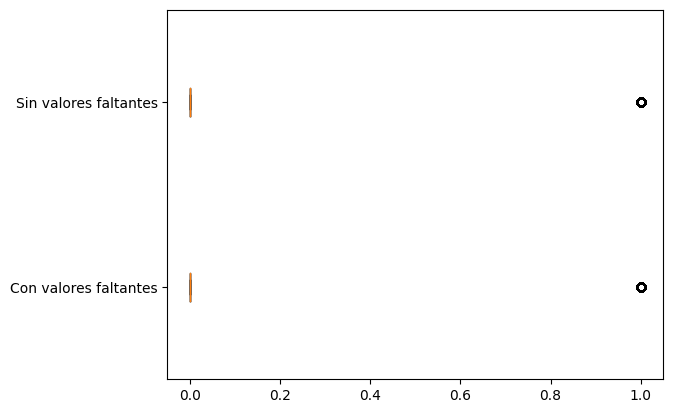

In [65]:
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].heart_disease
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

([<matplotlib.axis.YTick at 0x7dd901c0d330>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

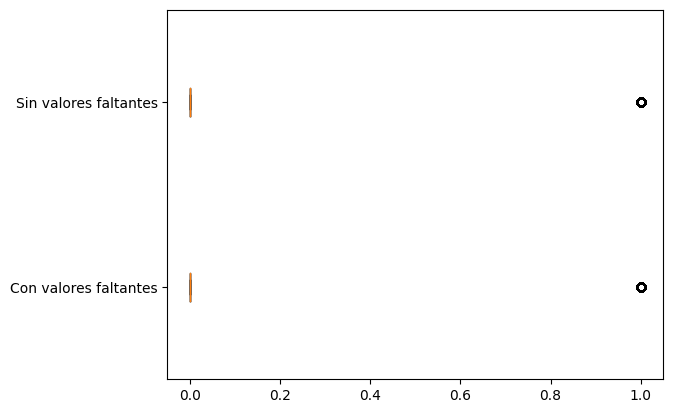

In [66]:
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].hypertension
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

([<matplotlib.axis.YTick at 0x7dd901a94a00>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

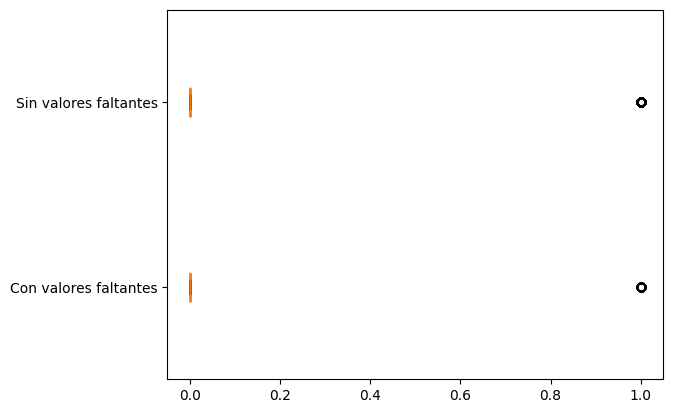

In [67]:
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].stroke
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

([<matplotlib.axis.YTick at 0x7dd901aefc10>,
 [Text(0, 1, 'Con valores faltantes'), Text(0, 2, 'Sin valores faltantes')])

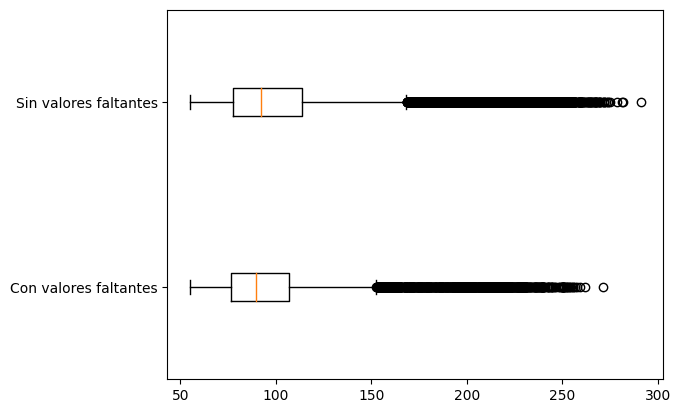

In [68]:
BM_MV=df.smoking_status.isna()
MV_labels=["Con valores faltantes","Sin valores faltantes"]
box_sr=pd.Series(" ",index=BM_MV.unique())
for poss in BM_MV.unique():
  BM = BM_MV == poss
  box_sr[poss]=df[BM].avg_glucose_level
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

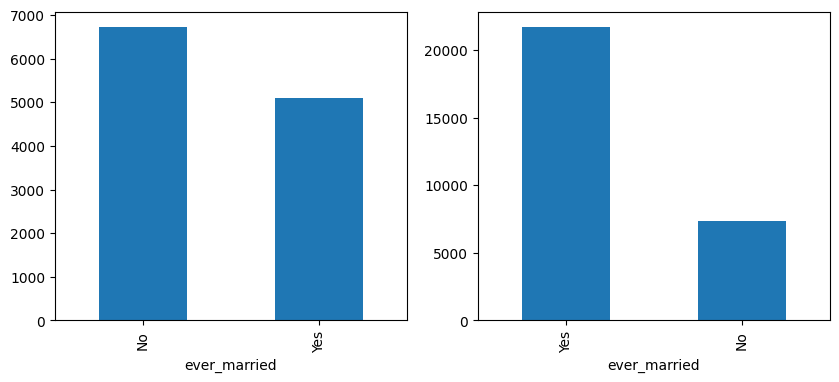

In [69]:
#fumar y si esta casado
BM_MV=df.smoking_status.isna()
MV_labels=["Sin valores faltantes","Con valores faltantes"]
plt.figure(figsize=(10, 4))
for i, poss in enumerate(BM_MV.unique()):
  plt.subplot(1,2,i+1)
  BM=BM_MV==poss
  df[BM].ever_married.value_counts().plot.bar() #lo unico que cambia es el tipo de grafico y las escalas porque ahora no son numericas sino son nombres
plt.show()

In [70]:
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
  plt.figure(figsize=(10,4))
  for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    df[BM][str_att_name].value_counts().plot.bar()
BM_MV=df.smoking_status.isna()


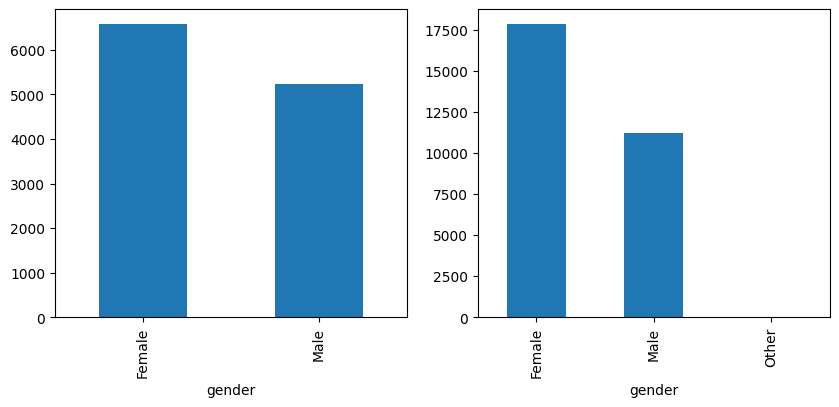

In [71]:
Diagnose_MV_Categorical(df,'gender',BM_MV)

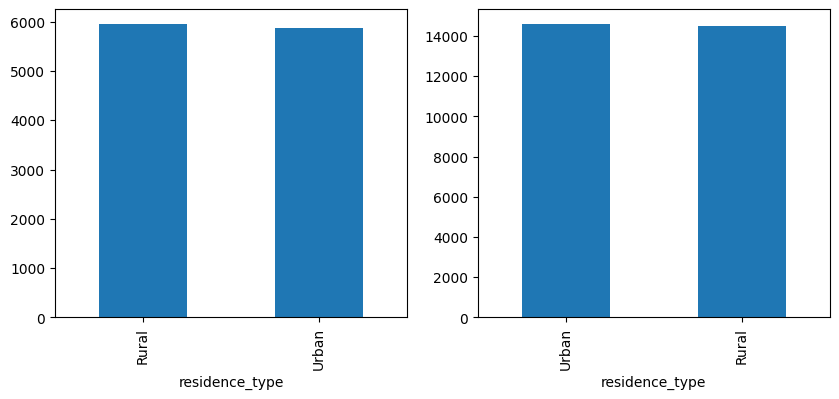

In [72]:
Diagnose_MV_Categorical(df,'residence_type',BM_MV)

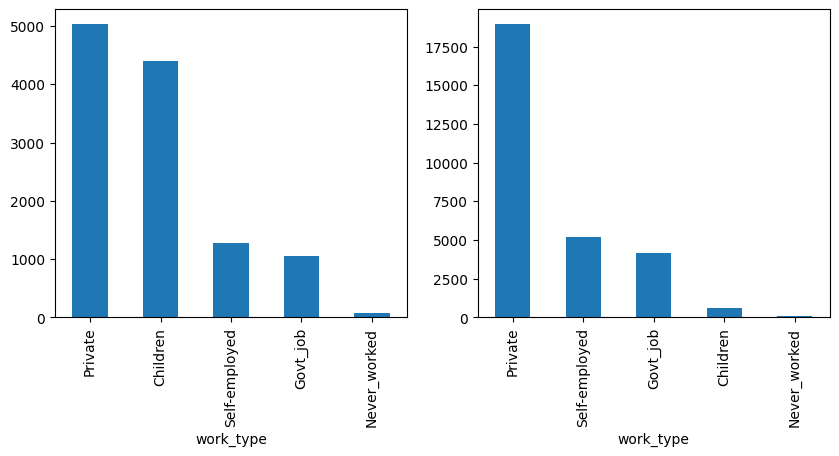

In [73]:
Diagnose_MV_Categorical(df,'work_type',BM_MV)

In [74]:
frecuencia=df["smoking_status"].value_counts()
frecuencia.idxmax() #mas comun es que nunca hayan fumado
frecuencia


,count
smoking_status,
Never smoked,15747
Formerly smoked,7099
Smokes,6226


In [75]:
df['smoking_status'].fillna("No smokes",inplace=True) #reemplazamos a los que tienen vacio por no fuman.

In [76]:
comprobacionvaloresnulos=df['smoking_status'].isna().sum()
comprobacionvaloresnulos

0

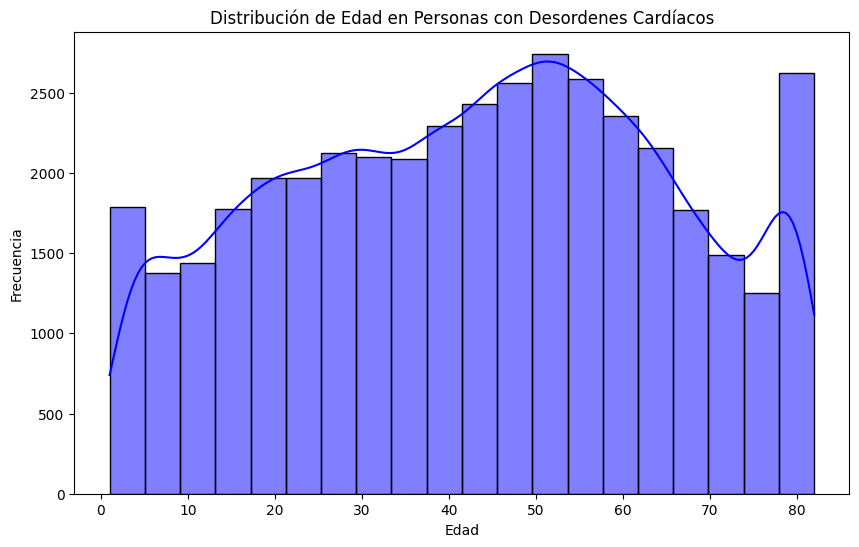

In [77]:
#frecuencia de las edades en las que se tiene desordenes cardiacos
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribución de Edad en Personas con Desordenes Cardíacos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



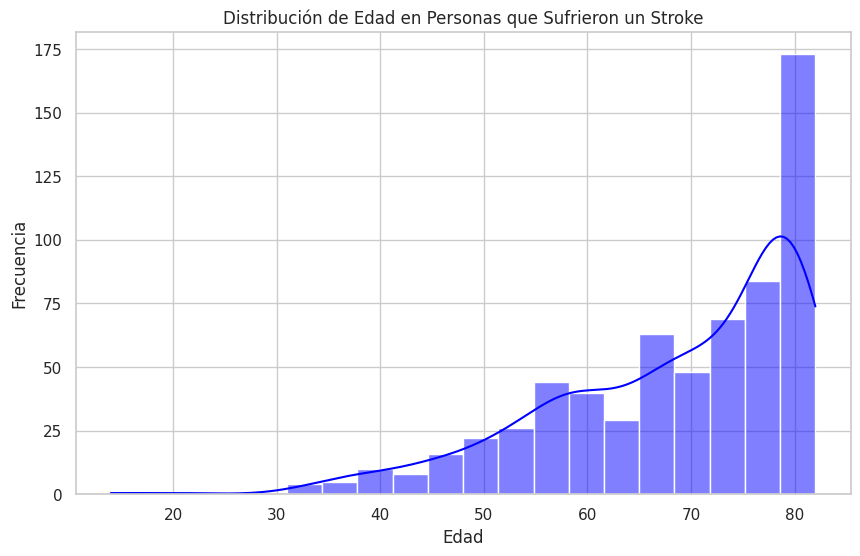

In [78]:
df_stroke = df[df['stroke'] == 1]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_stroke['age'], bins=20, kde=True, color='blue')
plt.title('Distribución de Edad en Personas que Sufrieron un Stroke')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()